In [15]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Load parquet files into DataFrames
df = pd.read_csv('/content/drive/My Drive/ilab dataset/real_final_df.csv')

In [3]:
print(df.columns)

Index(['lens_id', 'date_published', 'kind', 'text', 'claim_text',
       'applicant_name', 'invention_title', 'inventor_name', 'cited_lens_id',
       'cited_jurisdiction', 'cited_kind', 'symbol', 'grant_date', 'granted',
       'patent_status', 'cited_phase', 'nplcit_lens_id', 'nplcit_text',
       'patcit_jurisdiction', 'patcit_kind', 'main_cpc', 'sub_cpc',
       'main_cpc_description', 'sub_cpc_description', 'jurisdiction',
       'truncated_text', 'sentiment', 'categories', 'Time Horizon',
       'Opportunity-Challenge', 'Likelihood', 'Degree of Change',
       'Scale of Impact', 'summary'],
      dtype='object')


In [4]:
# Check for missing values
missing_values_count = df['date_published'].isna().sum()

# Print the count
print("Number of missing values in 'date_published':", missing_values_count)

Number of missing values in 'date_published': 0


In [5]:
unique_values = df['main_cpc'].unique()
print(unique_values)

['H' 'Y' 'B' 'A' 'C' 'F' 'G' 'E' 'D' nan]


In [6]:
# Data Preparation
# Filter the data for a specific category (main_cpc)
category = 'G'
category_data = df[df['main_cpc'] == category]

In [7]:
# Convert 'date_published' to datetime
category_data['date_published'] = pd.to_datetime(category_data['date_published'])

<ipython-input-7-f81ea59e457b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['date_published'] = pd.to_datetime(category_data['date_published'])


In [8]:
# Sort the data by date_published
category_data = category_data.sort_values(by='date_published')

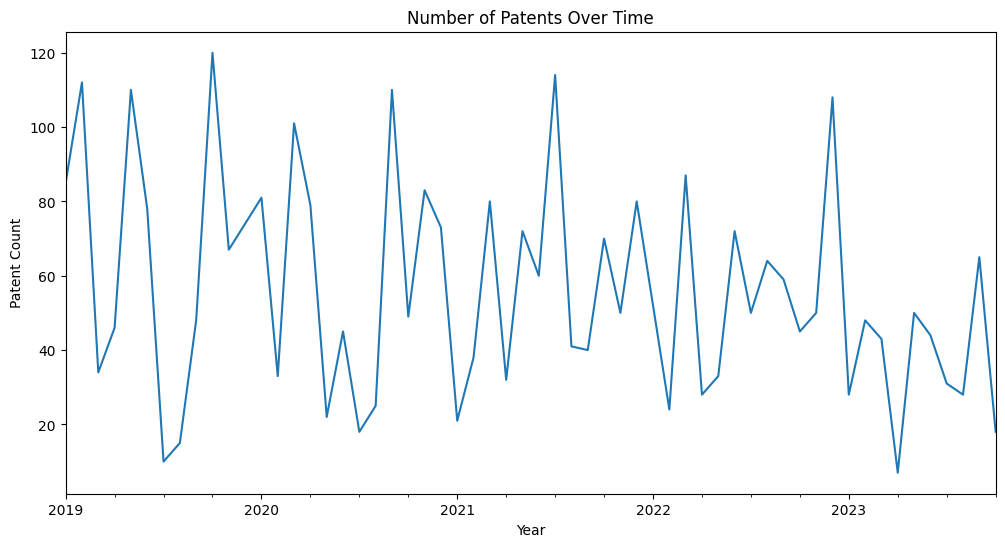

In [9]:
# Exploratory Data Analysis (EDA)
# Plot the number of patents over time
category_data.set_index('date_published', inplace=True)
patent_count = category_data.resample('M').size()  # Resample monthly
patent_count.plot(figsize=(12, 6))
plt.title('Number of Patents Over Time')
plt.xlabel('Year')
plt.ylabel('Patent Count')
plt.show()

In [10]:
# Time Series Modeling
# Decompose the time series data to identify trends, seasonality, and residuals
decomposition = seasonal_decompose(patent_count, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [13]:
pip install statsmodels

In [16]:
# Define the ARIMA model
model = ARIMA(patent_count, order=(5, 1, 0))
model_fit = model.fit()

In [18]:
# Predict future patent counts
predictions = model_fit.predict(start=len(patent_count), end=len(patent_count) + 10, typ='levels')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


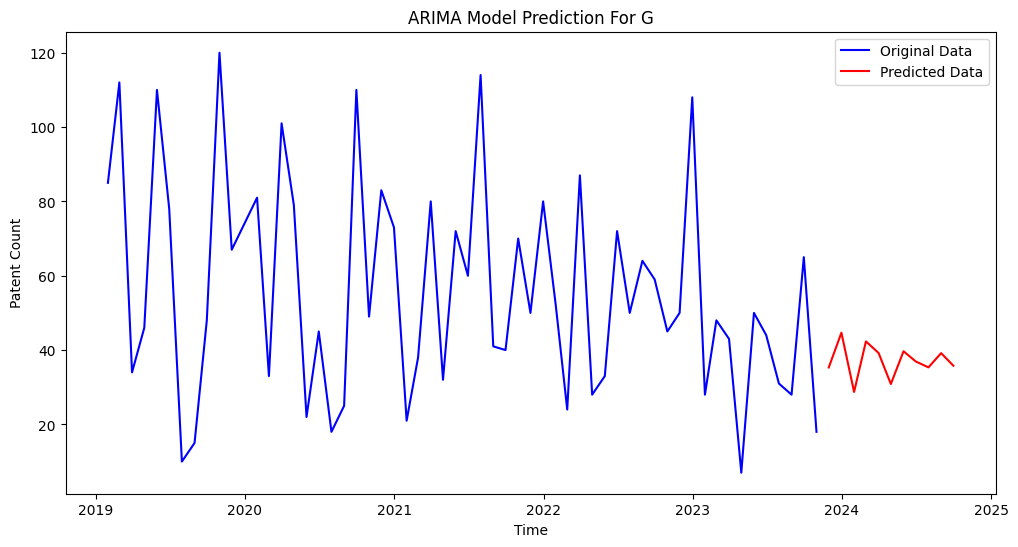

In [21]:
# Plot the original time series data
plt.figure(figsize=(12, 6))
plt.plot(patent_count, label='Original Data', color='blue')

# Plot the predicted values
plt.plot(predictions, label='Predicted Data', color='red')

# Set labels and legend
plt.xlabel('Time')
plt.ylabel('Patent Count')
plt.legend()

# Show the plot
plt.title('ARIMA Model Prediction For ' + category)
plt.show()
